This is a daily analysis of Fitbit activity, which will help us derive insights for BellaBeats Marketing efforts.

In [149]:

import numpy as np  
import pandas as pd 


#%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.9.2


In [12]:
df_dailyanalysis = pd.read_csv('daily_analysis.csv')
print('Data read into a pandas dataframe!')



Data read into a pandas dataframe!


In [4]:
df_dailyanalysis.head()


,id,ActivityDate,Calories,Id:1,ActivityDate:1,TotalSteps,TotalDistance,TrackerDistance,LoggedActivities,VeryActiveDistance,...,LightlyActiveMinutes:1,FairlyActiveMinutes:1,VeryActiveMinutes:1,SedentaryActiveDistance:1,LightActiveDistance:1,ModeratelyActiveDistance:1,VeryActiveDistance:1,Id:3,ActivityDay:1,StepTotal
0,1503960366,NaN,1985,1503960366,NaN,13162,8.5,8.5,NaN,1.88,...,328,13,25,0.0,6.06,0.55,1.88,1503960366,NaN,13162
1,1503960366,NaN,1985,1503960366,NaN,13162,8.5,8.5,NaN,1.88,...,328,13,25,0.0,6.06,0.55,1.88,1503960366,NaN,10735
2,1503960366,NaN,1985,1503960366,NaN,13162,8.5,8.5,NaN,1.88,...,328,13,25,0.0,6.06,0.55,1.88,1503960366,NaN,10460
3,1503960366,NaN,1985,1503960366,NaN,13162,8.5,8.5,NaN,1.88,...,328,13,25,0.0,6.06,0.55,1.88,1503960366,NaN,9762
4,1503960366,NaN,1985,1503960366,NaN,13162,8.5,8.5,NaN,1.88,...,328,13,25,0.0,6.06,0.55,1.88,1503960366,NaN,12669


In [14]:
df_dailyanalysis.tail()

,id,ActivityDate,Calories,Id:1,ActivityDate:1,TotalSteps,TotalDistance,TrackerDistance,LoggedActivities,VeryActiveDistance,...,LightlyActiveMinutes:1,FairlyActiveMinutes:1,VeryActiveMinutes:1,SedentaryActiveDistance:1,LightActiveDistance:1,ModeratelyActiveDistance:1,VeryActiveDistance:1,Id:3,ActivityDay:1,StepTotal
7335180,2347167796,NaN,1946,2347167796,NaN,8247,5.45,5.45,NaN,0.79,...,227,0,0,0.0,3.95,0.0,0.00,2347167796,NaN,42
7335181,2347167796,NaN,1946,2347167796,NaN,8247,5.45,5.45,NaN,0.79,...,295,9,26,0.0,5.32,0.4,1.86,2347167796,NaN,10113
7335182,2347167796,NaN,1946,2347167796,NaN,8247,5.45,5.45,NaN,0.79,...,295,9,26,0.0,5.32,0.4,1.86,2347167796,NaN,10352
7335183,2347167796,NaN,1946,2347167796,NaN,8247,5.45,5.45,NaN,0.79,...,295,9,26,0.0,5.32,0.4,1.86,2347167796,NaN,10129
7335184,2347167796,NaN,1946,2347167796,NaN,8247,5.45,5.45,NaN,0.79,...,295,9,26,0.0,5.32,0.4,1.86,2347167796,NaN,10465


In [15]:
df_dailyanalysis.columns

Index(['id', 'ActivityDate', 'Calories', 'Id:1', 'ActivityDate:1',
       'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivities',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories:1',
       'loggedactivitiesdistance', 'Id:2', 'ActivityDay', 'SedentaryMinutes:1',
       'LightlyActiveMinutes:1', 'FairlyActiveMinutes:1',
       'VeryActiveMinutes:1', 'SedentaryActiveDistance:1',
       'LightActiveDistance:1', 'ModeratelyActiveDistance:1',
       'VeryActiveDistance:1', 'Id:3', 'ActivityDay:1', 'StepTotal'],
      dtype='object')

In [31]:
ActiveDistance = df_dailyanalysis[['SedentaryActiveDistance','LightActiveDistance','ModeratelyActiveDistance','VeryActiveDistance']]

In [35]:
print(ActiveDistance)

# ActiveDistance.set_index('id')
ActiveDistance

                           0     1     2     3     4     5     6     7    \
SedentaryActiveDistance   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
LightActiveDistance       6.06  6.06  6.06  6.06  6.06  6.06  6.06  6.06   
ModeratelyActiveDistance  0.55  0.55  0.55  0.55  0.55  0.55  0.55  0.55   
VeryActiveDistance        1.88  1.88  1.88  1.88  1.88  1.88  1.88  1.88   

                           8     9    ...   990   991   992   993   994   995  \
SedentaryActiveDistance   0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00   
LightActiveDistance       6.06  6.06  ...  4.71  4.71  4.71  4.71  4.71  4.71   
ModeratelyActiveDistance  0.55  0.55  ...  0.69  0.69  0.69  0.69  0.69  0.69   
VeryActiveDistance        1.88  1.88  ...  1.57  1.57  1.57  1.57  1.57  1.57   

                           996   997   998   999  
SedentaryActiveDistance   0.00  0.00  0.00  0.00  
LightActiveDistance       4.71  4.71  4.71  4.71  
ModeratelyActiveDistance  0.69  0.69  0.69  0.69  
VeryActiv

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
SedentaryActiveDistance,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
LightActiveDistance,6.06,6.06,6.06,6.06,6.06,6.06,6.06,6.06,6.06,6.06,...,4.71,4.71,4.71,4.71,4.71,4.71,4.71,4.71,4.71,4.71
ModeratelyActiveDistance,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,0.55,...,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0.69
VeryActiveDistance,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,1.88,...,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57,1.57


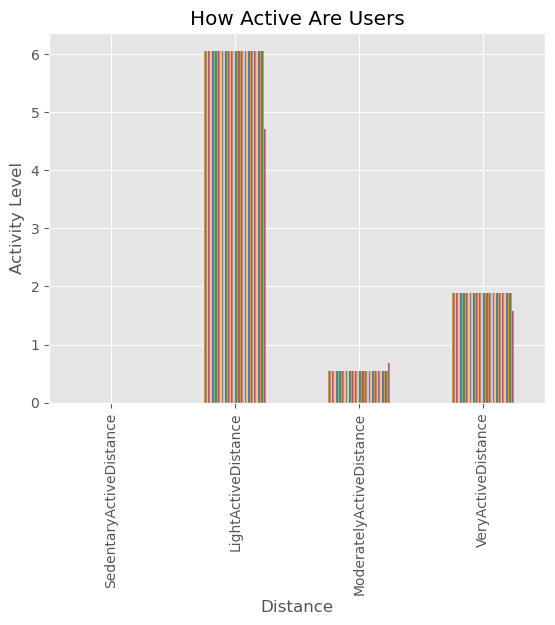

In [151]:
ActiveDistance = ActiveDistance[:1000]


ActiveDistance.plot(kind='bar')


plt.title('How Active Are Users')
plt.ylabel('Activity Level')
plt.xlabel('Distance')


plt.legend().remove()


plt.show()

Users are mostly working out for a light active distance.

In [70]:
ActiveMinutes = df_dailyanalysis[['LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']]

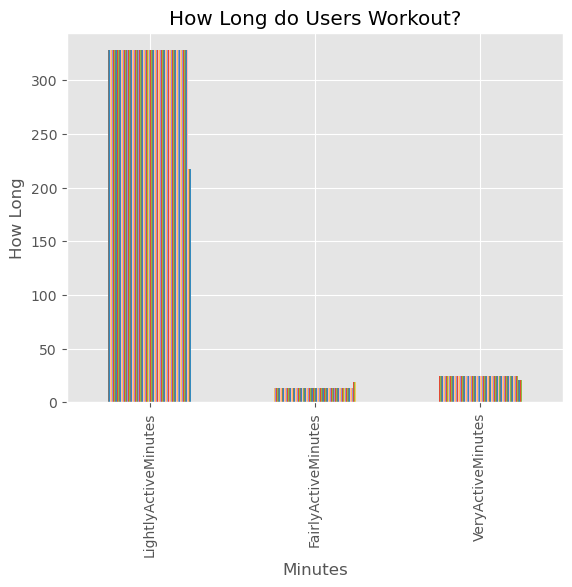

In [76]:
ActiveMinutes = ActiveMinutes[:1000]
ActiveMinutes.head()

ActiveMinutes = ActiveMinutes.transpose()

# Plot the data as a bar chart
ActiveMinutes.plot(kind='bar')

# Set the title and axis labels
plt.title('How Long do Users Workout?')
plt.ylabel('How Long')
plt.xlabel('Minutes')

# Hide the legend (if needed)
plt.legend().remove()

# Show the plot
plt.show()

Most users are active for a light amount of time each day

In [155]:
Cal_Steps = df_dailyanalysis[['Calories','TotalSteps','TotalDistance']]

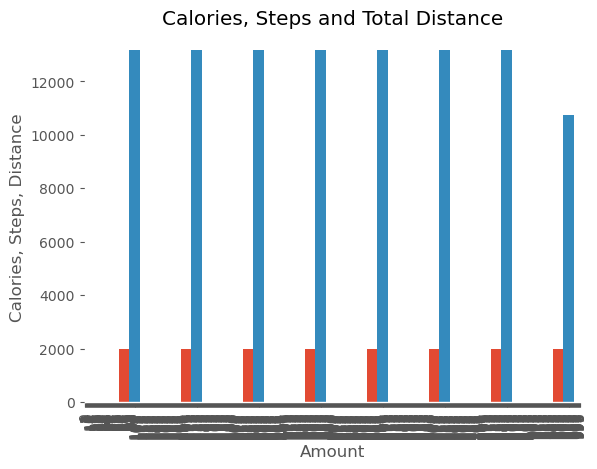

In [153]:
Cal_Steps = Cal_Steps[:1000]
Cal_Steps.head()

Cal_Steps = Cal_Steps.transpose()


Cal_Steps.plot(kind='bar')


plt.title('Calories, Steps and Total Distance')
plt.ylabel('Calories, Steps, Distance')
plt.xlabel('Amount')


plt.legend().remove()


plt.show()

In [97]:
Cal_Steps.loc['Calories'].describe()

count    1000.0
mean     1985.0
std         0.0
min      1985.0
25%      1985.0
50%      1985.0
75%      1985.0
max      1985.0
Name: Calories, dtype: float64

The average calories per day is 1985.

In [101]:
Cal_Steps.loc['TotalSteps'].describe()

count     1000.000000
mean     13067.347000
std        470.090018
min      10735.000000
25%      13162.000000
50%      13162.000000
75%      13162.000000
max      13162.000000
Name: TotalSteps, dtype: float64

The average total steps walked in a day are 13067

In [141]:
Cal_Steps.loc['TotalDistance'].describe()

count    1000.000000
mean        8.440330
std         0.296349
min         6.970000
25%         8.500000
50%         8.500000
75%         8.500000
max         8.500000
Name: TotalDistance, dtype: float64

The average total distance covered in one day is 8.44 miles, but are they all walked?

What we can conclude is that the majority of device users are lightly active and workout for a light amount of minutes each day.  Their average daily calories are 1985.  We can ascertain that device users can be a lot more active and of course want users to be highly active.  BellaBeats goal should be to encourage users to become more active and for a longer time each day.  Marketing campaigns can focus on promoting physical activity of users and potential users of the product.  It would also be interesting to analyze users' weights and motivation to exercise.